# Лабораторные работы по дисциплине "Методы, средства и технологии мультимедиа"

**Выполнила студентка гр. М8О-406Б-21 Волошинская Евгения Владимировна**

В качестве данных я выбрала датасет Loan Approval Classification Dataset (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data). Эти данные могут быть использованы для обучения моделей ИИ, которые автоматизируют процесс одобрения кредитов, оценивают кредитный риск, выявляют важные факторы при принятии решений, обнаруживают потенциальное мошенничество и персонализируют кредитные предложения. Это помогает финансовым учреждениям повысить эффективность, уменьшить ручную работу, принимать более обоснованные решения при обработке кредитных заявок и улучшать клиентский опыт.

Данные подходят как для задачи классификации, так и для регрессии.

Для задачи классификации (предсказание одобрения займа): т.к. классы не сбалансированы, то основные метрики качества для сравнения моделей - Precision, Recall, F1-мера, но также рассчитаны и точность, и матрица ошибок, полнота и AUC.

Для задачи регрессии (расчет процентной ставки по займу):
MSE, MAE, MAPE и R2

## Лабораторная работа №5: Проведение исследований с градиентным бустингом

Импортируем необходимые библиотеки:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


###Классификация

####Бейзлайн

In [ ]:
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred = gb.predict(X_test_scaled)

Accuracy : 92.66666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.88      0.78      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.88      0.89     13500
weighted avg       0.93      0.93      0.93     13500



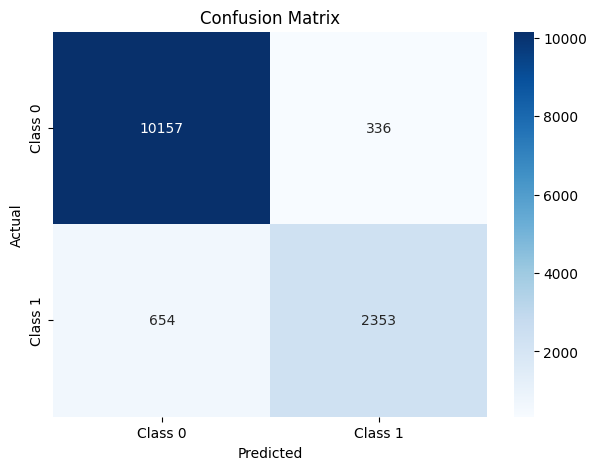

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

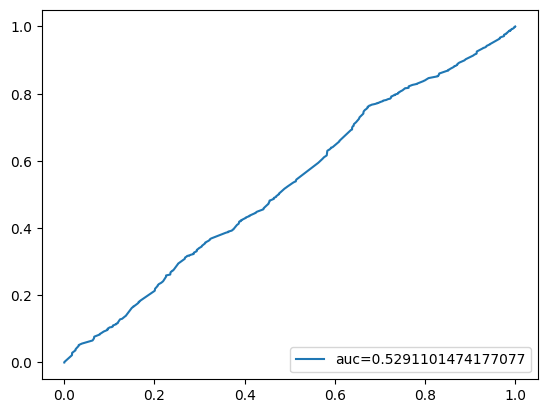

In [ ]:
# ROC curve
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

####Улучшенный бейзлайн

In [ ]:
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred = gb.predict(X_test_scaled)

Accuracy : 91.76296296296297
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10493
           1       0.87      0.74      0.80      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.86      0.87     13500
weighted avg       0.92      0.92      0.92     13500



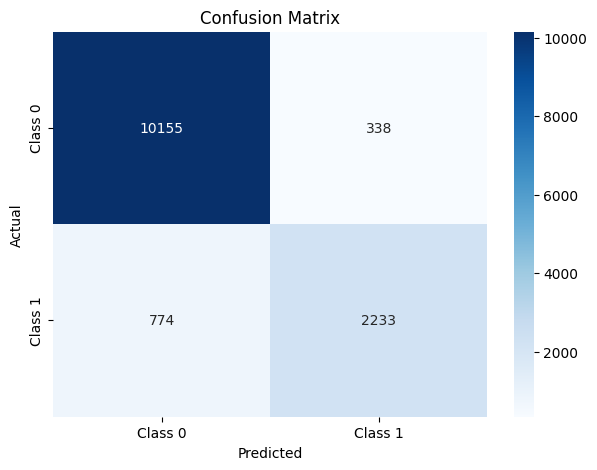

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

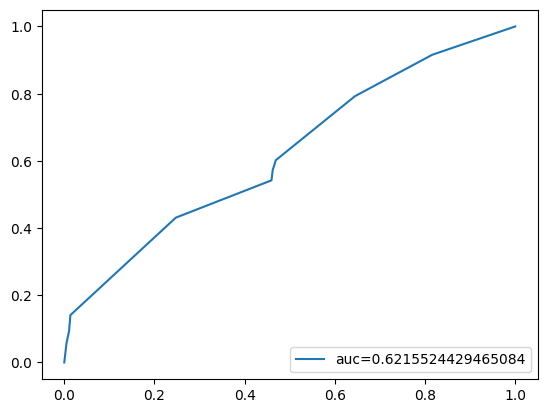

In [ ]:
# ROC curve
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

###Регрессия

#####Бейзлайн

In [23]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

In [24]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.182448467089088
Mean Absolute Error: 2.1754945346179486
Mean Absolute Percentage Error (%): 0.22257460207301924
R² Score: 0.18285718802887152


#####Улучшенный бейзлайн

In [30]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

In [31]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
b_regressor = GradientBoostingRegressor(random_state=42)

param_distributions = {
    'n_estimators': [30, 40],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = RandomizedSearchCV(gb_regressor, param_distributions, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(max_depth=5,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 40]},
                   scoring='neg_mean_squared_error')

In [36]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [64]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=7, min_samples_leaf=5, n_estimators=40,
                          random_state=42)

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.154658081639451
Mean Absolute Error: 2.1696660906498453
Mean Absolute Percentage Error (%): 0.22201293339358402
R² Score: 0.18601888334992145


###Самостоятельная реализация

####Классификация

#####Baseline

In [41]:
class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, (residuals > 0).astype(int))
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return (y_pred > 0.5).astype(int), y_pred

In [42]:
df = pd.read_csv("loan_data.csv")
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.9113333333333333
Confusion Matrix:
[[10037   456]
 [  741  2266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10493
           1       0.83      0.75      0.79      3007

    accuracy                           0.91     13500
   macro avg       0.88      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500

ROC AUC: 0.8550449377133966


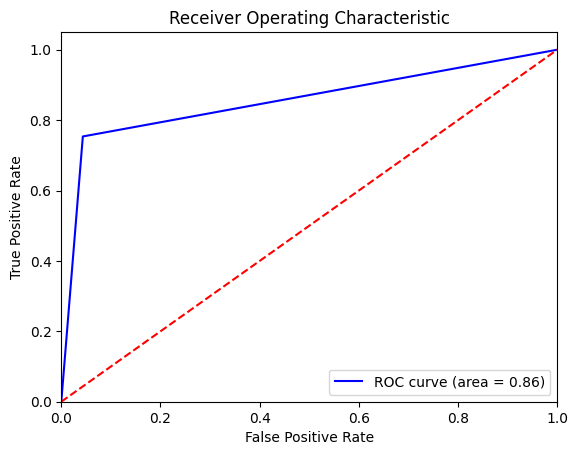

In [44]:
gb_classifier = CustomGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

gb_classifier.fit(X_train, y_train)

y_pred, y_pred_continuous = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_continuous)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#####Улучшение baseline

In [45]:
class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, residuals > 0)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return (y_pred > 0.5).astype(int), y_pred

In [46]:
df = pd.read_csv("loan_data.csv")
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.9075555555555556
Confusion Matrix:
[[10110   383]
 [  865  2142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10493
           1       0.85      0.71      0.77      3007

    accuracy                           0.91     13500
   macro avg       0.88      0.84      0.86     13500
weighted avg       0.90      0.91      0.90     13500

ROC AUC: 0.8383678022350783


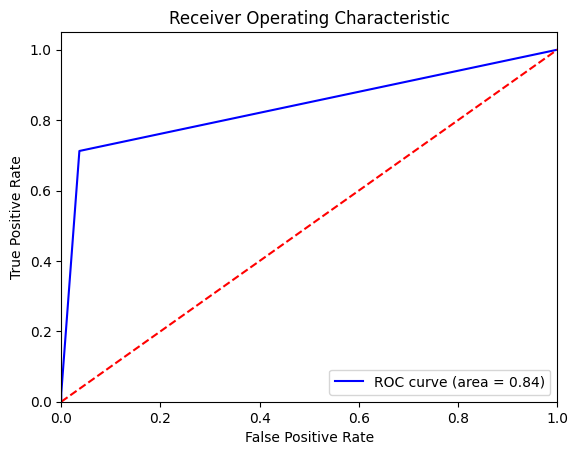

In [51]:
gb_classifier = CustomGradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth=3)

gb_classifier.fit(X_train, y_train)

y_pred, y_pred_continuous = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_continuous)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

####Регрессия

#####Baseline

In [52]:
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred

In [53]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

In [54]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
gb_regressor = CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.186082413925177
Mean Absolute Error: 2.1758404985324495
Mean Absolute Percentage Error (%): 0.22257052005114658
R² Score: 0.1824437560982699


#####Улучшение baseline

In [65]:
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=40, learning_rate=0.1, max_depth=7):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred

In [66]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

In [67]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
gb_regressor = CustomGradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=7)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.1488276511606506
Mean Absolute Error: 2.168418654894916
Mean Absolute Percentage Error (%): 0.22181321781283952
R² Score: 0.18668220789422973


##Вывод:

Что для задачи классификации, что для регрессии использование GradientBoostingRegressor дает схожие с другими продвинутыми алгоритмами результаты, при этом значительно ускоряя процесс обучения.